## Mounting google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!rm -rf /content/sample_data

Mounted at /content/drive


## Cloning repository

In [ ]:
!git clone https://github.com/arrafi-musabbir/coronary-artery-stenosis-detection.git

Cloning into 'coronary-artery-stenosis-detection'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 24 (delta 8), reused 10 (delta 2), pack-reused 0
Unpacking objects: 100% (24/24), done.


## Installing necessary libraries

In [ ]:
import os
%cd /content

!pip uninstall opencv-python opencv-contrib-python imgaug -y
!pip install imgaug==0.2.5 opencv-python-headless==4.1.2.30 lvis 

!pip install tf-models-official==2.8 tensorflow-gpu==2.8 keras==2.8 tensorboard==2.8 tensorflow-estimator==2.8
!pip install tensorflow.io

!apt-get install -qq protobuf-compiler python-pil python-lxml python-tk
!apt install --allow-change-held-packages libcudnn8=8.1.0.77-1+cuda11.2

!pip install -q Cython contextlib2 pillow lxml matplotlib
!pip install -q pycocotools

import tensorflow as tf
print("Installed Tensorflow version >>> ", tf.__version__)

/content
Found existing installation: opencv-python 4.1.2.30
Uninstalling opencv-python-4.1.2.30:
  Successfully uninstalled opencv-python-4.1.2.30
Found existing installation: opencv-contrib-python 4.1.2.30
Uninstalling opencv-contrib-python-4.1.2.30:
  Successfully uninstalled opencv-contrib-python-4.1.2.30
Found existing installation: imgaug 0.2.9
Uninstalling imgaug-0.2.9:
  Successfully uninstalled imgaug-0.2.9
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 562 kB 9.9 MB/s 
     |████████████████████████████████| 21.8 MB 1.6 MB/s 
     |████████████████████████████████| 60.9 MB 1.3 MB/s 
  Created wheel for imgaug: filename=imgaug-0.2.5-py3-none-any.whl size=561438 sha256=3fd79ff4702766b9a50264d6cf163888c016f4ca9364a60257bc1c8016494d9b
  Stored in directory: /root/.cache/pip/wheels/60/dd/38/d1dc2cad2b6a66dc0249261004990bccb0f27985c74ba26e49
Successfully built imgaug


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.2 MB 8.7 MB/s 
     |████████████████████████████████| 497.5 MB 10 kB/s 
     |████████████████████████████████| 43 kB 1.4 MB/s 
     |████████████████████████████████| 237 kB 57.6 MB/s 
     |████████████████████████████████| 1.1 MB 44.5 MB/s 
     |████████████████████████████████| 99 kB 8.3 MB/s 
     |████████████████████████████████| 4.9 MB 35.3 MB/s 
     |████████████████████████████████| 352 kB 49.2 MB/s 
     |████████████████████████████████| 92 kB 10.7 MB/s 
     |████████████████████████████████| 1.2 MB 42.6 MB/s 
     |████████████████████████████████| 636 kB 47.0 MB/s 
     |████████████████████████████████| 462 kB 49.9 MB/s 
  Created wheel for py-cpuinfo: filename=py_cpuinfo-8.0.0-py3-none-any.whl size=22257 sha256=a3e838193d1e4f08cf05e1abc4641fb5f4a22e069a3335de9c07ed52daebdb63
  Stored in directory: /root/.cache/pip/wheels/d2/f1/

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 25.9 MB 2.1 MB/s 
Selecting previously unselected package python-bs4.
(Reading database ... 155632 files and directories currently installed.)
Preparing to unpack .../0-python-bs4_4.6.0-1_all.deb ...
Unpacking python-bs4 (4.6.0-1) ...
Selecting previously unselected package python-pkg-resources.
Preparing to unpack .../1-python-pkg-resources_39.0.1-2_all.deb ...
Unpacking python-pkg-resources (39.0.1-2) ...
Selecting previously unselected package python-chardet.
Preparing to unpack .../2-python-chardet_3.0.4-1_all.deb ...
Unpacking python-chardet (3.0.4-1) ...
Selecting previously unselected package python-six.
Preparing to unpack .../3-python-six_1.11.0-2_all.deb ...
Unpacking python-six (1.11.0-2) ...
Selecting previously unselected package python-webencodings.
Preparing to unpack .../4-python-webencodings_0.5-2_all.deb ...
Unpacking python-webenc

## Downloading the TensorFlow Model Garden

In [ ]:
!git clone --quiet https://github.com/tensorflow/models.git

%cd /content/models/research
!protoc object_detection/protos/*.proto --python_out=.

os.environ['PYTHONPATH'] += ':/content/models/research/:/content/models/research/slim/'

!python /content/models/research/object_detection/builders/model_builder_test.py

/content/models/research


## Protobuf Installation/Compilation

In [ ]:
%cd /content/models/research
!protoc object_detection/protos/*.proto --python_out=.

/content/models/research


## COCO API installation

In [ ]:
!git clone https://github.com/cocodataset/cocoapi.git
%cd cocoapi/PythonAPI
!make
%cp -r pycocotools /content/models/research

Cloning into 'cocoapi'...
remote: Enumerating objects: 975, done.
remote: Total 975 (delta 0), reused 0 (delta 0), pack-reused 975
Receiving objects: 100% (975/975), 11.72 MiB | 17.84 MiB/s, done.
Resolving deltas: 100% (576/576), done.
/content/models/research/cocoapi/PythonAPI
python setup.py build_ext --inplace
running build_ext
cythoning pycocotools/_mask.pyx to pycocotools/_mask.c
/usr/local/lib/python3.7/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/models/research/cocoapi/PythonAPI/pycocotools/_mask.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
building 'pycocotools._mask' extension
creating build
creating build/common
creating build/temp.linux-x86_64-3.7
creating build/temp.linux-x86_64-3.7/pycocotools
x86_64-linux-gnu-gcc -pthread -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=f

## Test object detection API

In [ ]:
%cd /content/models/research
%cp object_detection/packages/tf2/setup.py .
!python -m pip install .
!python object_detection/builders/model_builder_tf2_test.py

/content/models/research
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/models/research
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
     |████████████████████████████████| 10.3 MB 6.8 MB/s 
     |████████████████████████████████| 67 kB 5.1 MB/s 
     |████████████████████████████████| 2.3 MB 47.8 MB/s 
     |████████████████████████████████| 151 kB 25.6 MB/s 
     |████████████████████████████████| 508 kB 43.7 MB/s 
     |████████████████████████████████| 46 kB 3.9 MB/s 
     |████████████████████████████████| 256 kB 47.2 MB/s 
     |████████████████████████████████| 62

## Downloading dataset

In [ ]:
from tqdm import tqdm
import zipfile
import time

%cd /content/
st = time.time()
q = input("Are you sure? Y/N :")
if q == 'Y':
    !wget https://md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com/ydrm75xywg-1.zip
    with zipfile.ZipFile('/content/ydrm75xywg-1.zip') as zf:
        for member in tqdm(zf.infolist(), desc='Extracting preliminary'):
            try:
                zf.extract(member, "/content/dataset")
            except zipfile.error as e:
                pass
    !rm /content/ydrm75xywg-1.zip
    with zipfile.ZipFile('/content/dataset/ydrm75xywg-1/Stenosis detection.zip') as zf:
        for member in tqdm(zf.infolist(), desc='Extracting final dataset'):
            try:
                zf.extract(member, "/content/stenosis_dataset")
            except zipfile.error as e:
                pass
    print("Cleaning up after downlaod and extraction")
    !rm -rf /content/dataset
    !rm -rf /content/stenosis_dataset/video_test
    !rm -rf /content/stenosis_dataset/video_val
    print("Download & extraction completed")
else:
    print("Moving on ...")

et = time.time()
elapsed_time = et - st
print('\nExecution time:', elapsed_time/60, ' minutes')

/content
Are you sure? Y/N :N
Moving on ...

Execution time: 0.0518347183863322  minutes


## Creating folder structure

In [ ]:
import os 
workspace_path = '/content/drive/MyDrive/workspace/'
workspace_model_path = workspace_path + 'stenosis_detection_FRCNN/'
annotation_path = workspace_model_path + 'annotations/'
exported_model_path = workspace_model_path + 'exported-models/'
images_path = workspace_model_path + 'images/'
trained_model_path = workspace_model_path + 'trained_model/'
pretrained_model_path = workspace_model_path + 'pre-trained-models/'

try:
    os.mkdir(workspace_path)
    print("Created workspace")
except FileExistsError :
    print("workspace directory already exists: creating rest of the structure inside workspace")
try:
    os.mkdir(workspace_model_path)
    os.mkdir(annotation_path)
    os.mkdir(exported_model_path)
    os.mkdir(images_path)
    os.mkdir(trained_model_path)
    os.mkdir(pretrained_model_path)
    print("full directory structure creation done")
except FileExistsError :
    print("directory structure already exists: Will be using existing directories")

workspace directory already exists: creating rest of the structure inside workspace
directory structure already exists: Will be using existing directories


## Creating labelmap.pbtxt

In [ ]:
labels = [{'name':'Stenosis', 'id':1}]
with open(annotation_path + "label_map.pbtxt", 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

## Partitioning the dataset

In [ ]:
st = time.time()
q = input("Are you sure? Y/N :")
if q == 'Y':
    if os.path.isdir("/content/stenosis_dataset/dataset"):
        !rm -rf /content/drive/MyDrive/workspace/stenosis_detection_FRCNN/images/
        os.mkdir(images_path)

        !python /content/coronary-artery-stenosis-detection/partition_dataset.py -x -i /content/stenosis_dataset/dataset -o /content/drive/MyDrive/workspace/stenosis_detection_FRCNN/images -r 0.1

        print("Dataset split into Train & Test")
        print("Cleaning up after partitioning dataset")
        !rm -rf /content/stenosis_dataset
    else:
      print("Dataset doesn't exists")
else:
    print('Moving on ...')
et = time.time()
elapsed_time = et - st
print('\nExecution time:', elapsed_time/60 , 'minutes')

Are you sure? Y/N :Y
/content/coronary-artery-stenosis-detection/partition_dataset.py:35: DeprecationWarning: Flags not at the start of the expression '([a-zA-Z0-9\\s_\\\\.\\-\\' (truncated)
  if re.search(r'([a-zA-Z0-9\s_\\.\-\(\):])+(?i)(.jpg|.jpeg|.png|.bmp)$', f)]
Dataset split into Train & Test
Cleaning up after partitioning dataset
Execution time: 4.6686864773432415 minutes


## Generating TF records

### train record

In [ ]:
st = time.time()
q = input("Are you sure? Y/N :")
if q == 'Y':
    !python /content/coronary-artery-stenosis-detection/generate_tfrecord.py -x /content/drive/MyDrive/workspace/stenosis_detection_FRCNN/images/train -l /content/drive/MyDrive/workspace/stenosis_detection_FRCNN/annotations/label_map.pbtxt -o /content/drive/MyDrive/workspace/stenosis_detection_FRCNN/annotations/train.record
else:
    print('Moving on ...')
et = time.time()
elapsed_time = et - st
print('\nGenerated train.record successfully')
print('Execution time:', elapsed_time/60 , 'minutes')

Successfully created the TFRecord file: /content/drive/MyDrive/workspace/stenosis_detection_FRCNN/annotations/train.record

 Generated train.record successfully
Execution time: 6.282655191421509 minutes


### test record

In [ ]:
st = time.time()
q = input("Are you sure? Y/N :")
if q == 'Y':
    !python /content/coronary-artery-stenosis-detection/generate_tfrecord.py -x /content/drive/MyDrive/workspace/stenosis_detection_FRCNN/images/test -l /content/drive/MyDrive/workspace/stenosis_detection_FRCNN/annotations/label_map.pbtxt -o /content/drive/MyDrive/workspace/stenosis_detection_FRCNN/annotations/test.record
else:
    print('Moving on ...')
et = time.time()
elapsed_time = et - st
print('\nGenerated train.record successfully')
print('Execution time:', elapsed_time/60 , 'minutes')

Successfully created the TFRecord file: /content/drive/MyDrive/workspace/stenosis_detection_FRCNN/annotations/test.record

 Generated train.record successfully
Execution time: 4.545587809880574 minutes


## Download & extract pretrained model

In [ ]:
%cd /content/drive/MyDrive/workspace/stenosis_detection_FRCNN/pre-trained-models
!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/faster_rcnn_inception_resnet_v2_1024x1024_coco17_tpu-8.tar.gz
!tar -xzvf /content/drive/MyDrive/workspace/stenosis_detection_FRCNN/pre-trained-models/faster_rcnn_inception_resnet_v2_1024x1024_coco17_tpu-8.tar.gz
!rm /content/drive/MyDrive/workspace/stenosis_detection_FRCNN/pre-trained-models/faster_rcnn_inception_resnet_v2_1024x1024_coco17_tpu-8.tar.gz
print("\nDownload & extraction completed")

/content/drive/.shortcut-targets-by-id/19rcwKUZQHYVyynGSgm5qlA-3QgO0RMOl/workspace/stenosis_detection_FRCNN/pre-trained-models
--2022-06-11 15:09:07--  http://download.tensorflow.org/models/object_detection/tf2/20200711/faster_rcnn_inception_resnet_v2_1024x1024_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 74.125.142.128, 2607:f8b0:400e:c08::80
Connecting to download.tensorflow.org (download.tensorflow.org)|74.125.142.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 447961769 (427M) [application/x-tar]
Saving to: ‘faster_rcnn_inception_resnet_v2_1024x1024_coco17_tpu-8.tar.gz’

faster_rcnn_incepti 100%[===================>] 427.21M  56.3MB/s    in 9.0s    

2022-06-11 15:09:16 (47.7 MB/s) - ‘faster_rcnn_inception_resnet_v2_1024x1024_coco17_tpu-8.tar.gz’ saved [447961769/447961769]

faster_rcnn_inception_resnet_v2_1024x1024_coco17_tpu-8/
faster_rcnn_inception_resnet_v2_1024x1024_coco17_tpu-8/checkpoint/
faster_rcnn_inceptio

## Configure training pipeline

In [ ]:
%cd /content/
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

/content


In [ ]:
my_model_path = trained_model_path + "my_FRCNN/"
CONFIG_PATH = my_model_path + "pipeline.config"

In [ ]:
try:
    os.mkdir(my_model_path)
except FileExistsError :
    print("my FRCNN already exists")
!cp {"/content/drive/MyDrive/workspace/stenosis_detection_FRCNN/pre-trained-models/faster_rcnn_inception_resnet_v2_1024x1024_coco17_tpu-8/pipeline.config"} {my_model_path}
config = config_util.get_configs_from_pipeline_file(CONFIG_PATH)

my FRCNN already exists


In [ ]:
config = config_util.get_configs_from_pipeline_file(CONFIG_PATH)
CONFIG_PATH

'/content/drive/MyDrive/workspace/stenosis_detection_FRCNN/trained_model/my_FRCNN/pipeline.config'

In [ ]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(CONFIG_PATH, "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)  

In [ ]:
pipeline_config.model.faster_rcnn.num_classes = 1
pipeline_config.train_config.batch_size = 1
pipeline_config.train_config.fine_tune_checkpoint = pretrained_model_path + "faster_rcnn_inception_resnet_v2_1024x1024_coco17_tpu-8/checkpoint/ckpt-0"
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_config.use_bfloat16 = False
pipeline_config.train_input_reader.label_map_path= annotation_path + "label_map.pbtxt"
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [annotation_path + "train.record"]
pipeline_config.eval_input_reader[0].label_map_path = annotation_path + "label_map.pbtxt"
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [annotation_path + "test.record"]

In [ ]:
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(CONFIG_PATH, "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)   

In [ ]:
updated_config_path = my_model_path + "pipeline.config"
updated_config = config_util.get_configs_from_pipeline_file(updated_config_path)
updated_config

{'eval_config': metrics_set: "coco_detection_metrics"
 use_moving_averages: false
 batch_size: 1,
 'eval_input_config': label_map_path: "/content/drive/MyDrive/workspace/stenosis_detection_FRCNN/annotations/label_map.pbtxt"
 shuffle: false
 num_epochs: 1
 tf_record_input_reader {
   input_path: "/content/drive/MyDrive/workspace/stenosis_detection_FRCNN/annotations/test.record"
 },
 'eval_input_configs': [label_map_path: "/content/drive/MyDrive/workspace/stenosis_detection_FRCNN/annotations/label_map.pbtxt"
 shuffle: false
 num_epochs: 1
 tf_record_input_reader {
   input_path: "/content/drive/MyDrive/workspace/stenosis_detection_FRCNN/annotations/test.record"
 }
 ],
 'model': faster_rcnn {
   num_classes: 1
   image_resizer {
     keep_aspect_ratio_resizer {
       min_dimension: 800
       max_dimension: 1333
       pad_to_max_dimension: true
     }
   }
   feature_extractor {
     type: "faster_rcnn_inception_resnet_v2_keras"
   }
   first_stage_anchor_generator {
     grid_anchor_ge

## Training the model

### Configuring GPU

In [ ]:
gpus = tf.config.experimental.list_physical_devices("GPU")
tf.config.experimental.set_memory_growth(gpus[0], True)
gpus

IndexError: ignored

### Training model

In [ ]:
!python /content/models/research/object_detection/model_main_tf2.py --model_dir=/content/drive/MyDrive/workspace/stenosis_detection_FRCNN/trained_model/my_FRCNN --pipeline_config_path=/content/drive/MyDrive/workspace/stenosis_detection_FRCNN/trained_model/my_FRCNN/pipeline.config --num_train_steps=20000

2022-06-11 07:30:53.105232: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
I0611 07:30:53.176881 139937817839488 mirrored_strategy.py:374] Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
INFO:tensorflow:Maybe overwriting train_steps: 20000
I0611 07:30:53.189944 139937817839488 config_util.py:552] Maybe overwriting train_steps: 20000
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I0611 07:30:53.190916 139937817839488 config_util.py:552] Maybe overwriting use_bfloat16: False
Instructions for updating:
rename to distribute_datasets_from_function
W0611 07:30:53.758241 139937817839488 deprecation.py:343] From /content/models/research/object_detection/model_lib_v2.py:564: StrategyBase.experimental_distribut

## Evaluating the model

In [ ]:
!python /content/models/research/object_detection/model_main_tf2.py --model_dir=/content/drive/MyDrive/workspace/stenosis_detection_FRCNN/trained_model/my_FRCNN --pipeline_config_path=/content/drive/MyDrive/workspace/stenosis_detection_FRCNN/trained_model/my_FRCNN/pipeline.config --checkpoint_dir=/content/drive/MyDrive/workspace/stenosis_detection_FRCNN/trained_model/my_FRCNN

## Exporting model

In [ ]:
os.mkdir("/content/drive/MyDrive/workspace/stenosis_detection_FRCNN/exported-models/my_model_20000")

FileExistsError: ignored

In [ ]:
!python /content/models/research/object_detection/exporter_main_v2.py --input_type image_tensor --pipeline_config_path /content/drive/MyDrive/workspace/stenosis_detection_FRCNN/trained_model/my_FRCNN/pipeline.config --trained_checkpoint_dir /content/drive/MyDrive/workspace/stenosis_detection_FRCNN/trained_model/my_FRCNN --output_directory /content/drive/MyDrive/workspace/stenosis_detection_FRCNN/exported-models/my_model_20000

2022-06-11 15:11:15.729609: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.map_fn(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.map_fn(fn, elems))
W0611 15:11:17.528967 140638064674688 deprecation.py:615] From /usr/local/lib/python3.7/dist-packages/tensorflow/python/autograph/impl/api.py:458: calling map_fn_v2 (from tensorflow.python.ops.map_fn) with back_prop=False is deprecated and will be removed in a future version.
Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.map_fn(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.map_fn(fn, elems))
INFO:tensorflow:depth of additional conv before box predictor: 0
I0611 15:11:37.052408 14

## Inferencing trained model

In [ ]:
"""
Object Detection (On Image) From TF2 Saved Model
=====================================
"""

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'    # Suppress TensorFlow logging (1)
import pathlib
import tensorflow as tf
import cv2
import argparse
from google.colab.patches import cv2_imshow

# Enable GPU dynamic memory allocation
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)


# PROVIDE PATH TO MODEL DIRECTORY
PATH_TO_MODEL_DIR = '/content/drive/MyDrive/workspace/stenosis_detection_FRCNN/exported-models/my_model_20000'

# PROVIDE PATH TO LABEL MAP
PATH_TO_LABELS = '/content/drive/MyDrive/workspace/stenosis_detection_FRCNN/annotations/label_map.pbtxt'

# PROVIDE THE MINIMUM CONFIDENCE THRESHOLD
MIN_CONF_THRESH = float(0.80)

# LOAD THE MODEL

import time
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils

PATH_TO_SAVED_MODEL = "/content/drive/MyDrive/workspace/stenosis_detection_FRCNN/exported-models/my_model_20000/saved_model"

print('Loading model...', end='')
start_time = time.time()

# LOAD SAVED MODEL AND BUILD DETECTION FUNCTION
detect_fn = tf.saved_model.load(PATH_TO_SAVED_MODEL)

end_time = time.time()
elapsed_time = end_time - start_time
print('Done! Took {} seconds'.format(elapsed_time))

# LOAD LABEL MAP DATA FOR PLOTTING

category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS,
                                                                    use_display_name=True)


Loading model...Done! Took 44.052143573760986 seconds


## Detecting stenosis

Running inference for /content/drive/MyDrive/workspace/stenosis_detection_FRCNN/images/test/14_002_5_0031.bmp... Done


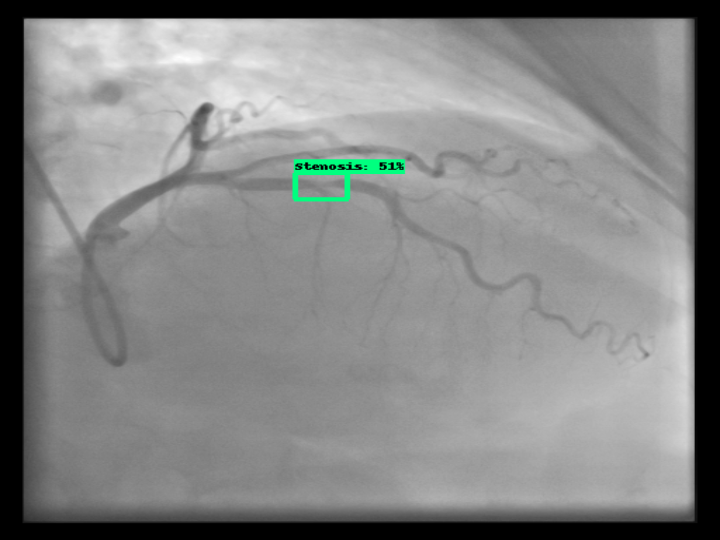

In [ ]:
# PROVIDE PATH TO IMAGE DIRECTORY
IMAGE_PATHS = '/content/drive/MyDrive/workspace/stenosis_detection_FRCNN/images/test/14_007_10_0071.bmp'

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')   # Suppress Matplotlib warnings

def load_image_into_numpy_array(path):
    """Load an image from file into a numpy array.
    Puts image into numpy array to feed into tensorflow graph.
    Note that by convention we put it into a numpy array with shape
    (height, width, channels), where channels=3 for RGB.
    Args:
      path: the file path to the image
    Returns:
      uint8 numpy array with shape (img_height, img_width, 3)
    """
    return np.array(Image.open(path))


print('Running inference for {}... '.format(IMAGE_PATHS), end='')

image = cv2.imread(IMAGE_PATHS)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_expanded = np.expand_dims(image_rgb, axis=0)

# The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
input_tensor = tf.convert_to_tensor(image)
# The model expects a batch of images, so add an axis with `tf.newaxis`.
input_tensor = input_tensor[tf.newaxis, ...]

# input_tensor = np.expand_dims(image_np, 0)
detections = detect_fn(input_tensor)

# All outputs are batches tensors.
# Convert to numpy arrays, and take index [0] to remove the batch dimension.
# We're only interested in the first num_detections.
num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
               for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

image_with_detections = image.copy()

# SET MIN_SCORE_THRESH BASED ON YOU MINIMUM THRESHOLD FOR DETECTIONS
viz_utils.visualize_boxes_and_labels_on_image_array(
      image_with_detections,
      detections['detection_boxes'],
      detections['detection_classes'],
      detections['detection_scores'],
      category_index,
      use_normalized_coordinates=True,
      max_boxes_to_draw=1,
      min_score_thresh=0.3,
      agnostic_mode=False)

print('Done')
# DISPLAYS OUTPUT IMAGE
imS = cv2.resize(image_with_detections, (720, 540)) 
cv2_imshow(imS)
# CLOSES WINDOW ONCE KEY IS PRESSED